In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
#carregar os dados do arquivo txt
data = pd.read_csv('sant_716_2005_2022 .txt', delimiter='\t', header=None)

In [3]:
# Renomear as colunas
data.columns = ['dt', 'hr', 'alt']

In [4]:
# Concatenando as colunas 'dt' e 'hr' e convertendo para o formato datetime
data['dt_hr'] = pd.to_datetime(data['dt'] + ' ' + data['hr'], format='%d/%m/%Y %H:%M')

In [5]:
# Converter a coluna 'dt_hrs' para o índice do DataFrame, se ainda não estiver
data.set_index('dt_hr', inplace=True)

In [6]:
# referenciar ao imbituba
# Calcula a média da coluna 'mare'
datum = 2.635

# Subtrai a média de todos os valores na coluna 'mare' e adiciona como uma nova coluna
data['alt_ref'] = data['alt'] - datum
data['alt_ref'] = data['alt_ref'] * 100
# Exibe os primeiros valores do DataFrame com as colunas originais e a 'mare' centralizada
print(data[['dt', 'hr', 'alt', 'alt_ref',]])

                             dt     hr    alt  alt_ref
dt_hr                                                 
2005-10-01 02:00:00  01/10/2005  02:00  3.244     60.9
2005-10-01 03:00:00  01/10/2005  03:00  3.306     67.1
2005-10-01 04:00:00  01/10/2005  04:00  3.049     41.4
2005-10-01 05:00:00  01/10/2005  05:00  2.567     -6.8
2005-10-01 06:00:00  01/10/2005  06:00  2.085    -55.0
...                         ...    ...    ...      ...
2022-12-31 19:00:00  31/12/2022  19:00  1.131   -150.4
2022-12-31 20:00:00  31/12/2022  20:00  1.664    -97.1
2022-12-31 21:00:00  31/12/2022  21:00  2.607     -2.8
2022-12-31 22:00:00  31/12/2022  22:00  3.304     66.9
2022-12-31 23:00:00  31/12/2022  23:00  3.497     86.2

[151222 rows x 4 columns]


In [7]:
# Concatenando as colunas 'dt' e 'hr' e convertendo para o formato datetime
data['dia_hora'] = data['dt'] + ' ' + data['hr']

data['dia_hora'] = pd.to_datetime(data['dia_hora'], format='%d/%m/%Y %H:%M')

# Exibindo o DataFrame atualizado
print(data)

                             dt     hr    alt  alt_ref            dia_hora
dt_hr                                                                     
2005-10-01 02:00:00  01/10/2005  02:00  3.244     60.9 2005-10-01 02:00:00
2005-10-01 03:00:00  01/10/2005  03:00  3.306     67.1 2005-10-01 03:00:00
2005-10-01 04:00:00  01/10/2005  04:00  3.049     41.4 2005-10-01 04:00:00
2005-10-01 05:00:00  01/10/2005  05:00  2.567     -6.8 2005-10-01 05:00:00
2005-10-01 06:00:00  01/10/2005  06:00  2.085    -55.0 2005-10-01 06:00:00
...                         ...    ...    ...      ...                 ...
2022-12-31 19:00:00  31/12/2022  19:00  1.131   -150.4 2022-12-31 19:00:00
2022-12-31 20:00:00  31/12/2022  20:00  1.664    -97.1 2022-12-31 20:00:00
2022-12-31 21:00:00  31/12/2022  21:00  2.607     -2.8 2022-12-31 21:00:00
2022-12-31 22:00:00  31/12/2022  22:00  3.304     66.9 2022-12-31 22:00:00
2022-12-31 23:00:00  31/12/2022  23:00  3.497     86.2 2022-12-31 23:00:00

[151222 rows x 5 columns

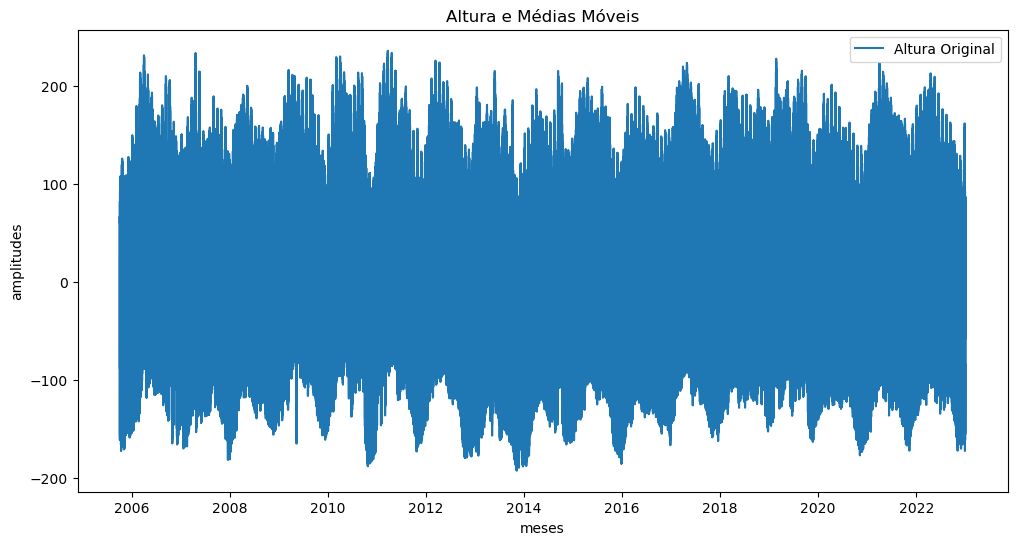

In [8]:
# Plotar as alturas originais
plt.figure(figsize =(12, 6))
plt.plot(data['alt_ref'], label='Altura Original')
# Adicionar rótulos e legendas
plt.xlabel('meses')
plt.ylabel('amplitudes')
plt.title('Altura e Médias Móveis')
plt.legend()

# Mostrar o gráfico
plt.show()

In [9]:
# Construindo a matriz A0 para regressão linear
fft_A0 = np.column_stack([np.ones(len(data)), data['dia_hora'].apply(lambda x: x.to_julian_date())])
#x0 = np.linalg.lstsq(A0, df['alt_zero'], rcond=None)[0]
fft_x0 = np.linalg.lstsq(fft_A0, data['alt_ref'], rcond=None)[0]
mod_fft = fft_A0.dot(fft_x0) #tendencia estimada

#subtração da tendencia
altura_tend = data['alt_ref'] - mod_fft

In [10]:
# Converter a coluna 'data_hora' para o índice do DataFrame, se ainda não estiver
data.set_index('dia_hora', inplace=True)

# Calcular a média mensal da coluna 'alt_zero' corresponde a altura após a subtração da 
media_mensal = data['alt_ref'].resample('M').mean()

# Exibir a média mensal
print(media_mensal)

dia_hora
2005-10-31   -46.338275
2005-11-30   -42.752361
2005-12-31   -32.631317
2006-01-31   -17.779570
2006-02-28    -0.243155
                ...    
2022-08-31     0.587634
2022-09-30    -1.979028
2022-10-31   -22.893011
2022-11-30   -38.653056
2022-12-31   -35.212097
Freq: ME, Name: alt_ref, Length: 207, dtype: float64


C:\Users\labdi\AppData\Local\Temp\ipykernel_22304\1265658239.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  media_mensal = data['alt_ref'].resample('M').mean()


In [11]:
# Cria um novo DataFrame com as médias mensais de'data_hora' e alt_zero

df = pd.DataFrame({
    'data_hora': media_mensal.index,
    'alt_ref': media_mensal.values
})

# Exibe o novo DataFrame com as médias mensais
print(df)

     data_hora    alt_ref
0   2005-10-31 -46.338275
1   2005-11-30 -42.752361
2   2005-12-31 -32.631317
3   2006-01-31 -17.779570
4   2006-02-28  -0.243155
..         ...        ...
202 2022-08-31   0.587634
203 2022-09-30  -1.979028
204 2022-10-31 -22.893011
205 2022-11-30 -38.653056
206 2022-12-31 -35.212097

[207 rows x 2 columns]


In [12]:
# Construindo a matriz A0 para regressão linear
A0 = np.column_stack([np.ones(len(df)), df['data_hora'].apply(lambda x: x.to_julian_date())])
#x0 = np.linalg.lstsq(A0, df['alt_zero'], rcond=None)[0]
x0 = np.linalg.lstsq(A0, df['alt_ref'], rcond=None)[0]
alt_est = A0.dot(x0) #tendencia estimada

In [13]:
import pandas as pd
from scipy.stats import linregress

# Convertendo a coluna de data_hora para o ano
df.loc[:, 'ano_01'] = df['data_hora'].dt.year

# Calculando a regressão linear
slope, intercept, r_value, p_value, std_err = linregress(df['ano_01'], df['alt_ref'])

# Tendência por ano (inclinação da reta)
tendencia_por_ano = slope

# Grau de incerteza
incerteza = std_err


print("Tendência por ano:", tendencia_por_ano)
print("Incerteza:", incerteza)

Tendência por ano: 0.3420780513930119
Incerteza: 0.32039893412159615


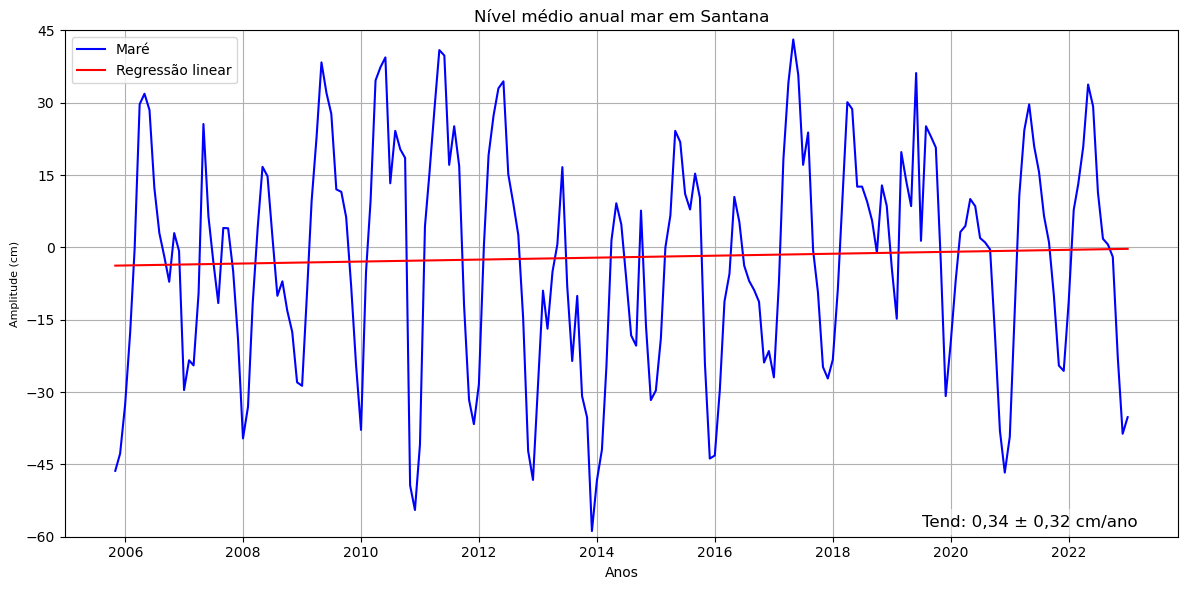

In [37]:
# Importe a biblioteca Matplotlib
import matplotlib.pyplot as plt

# Resolução desejada
dpi = 300
Trend = '0,34 ± 0,32'  # Defina o valor da tendência

# Plotagem do gráfico
plt.figure(figsize=(12, 6))
plt.plot(df['data_hora'], df['alt_ref'], 'b', label='Maré')
#plt.plot(df_mensal['data_hora'], df_mensal['nivel_do_mar_interp'], linestyle='--', color='b', label='Maré')  # Corrigido aqui
#plt.plot(df_mensal['data_hora'], tendencia, 'r', label='Regressão linear', 'lineWidth', 1.5)
plt.plot(df['data_hora'], alt_est, 'r', label='Regressão linear', linewidth=1.5)


# Adicione o valor da tendência linear abaixo da legenda
plt.text(0.77, 0.02, f'Tend: {Trend} cm/ano', transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='w', edgecolor='none', alpha=0.5))

plt.title('Nível médio anual mar em Santana', fontsize=12)
plt.legend(loc='upper left')
plt.xlabel('Anos')
plt.ylabel('Amplitude (cm)', fontsize=8)
plt.grid(True)
# Define os limites e os marcadores dos eixos y
plt.ylim(-60 , 45)
plt.yticks(range(-60, 46, 15))
# Define o formato do eixo x para mostrar anos e meses (AAAA, MM)
# Salvar a figura
plt.savefig('D:/graficos/Tendencia/nivel_medio_anual_Santana_01.png', dpi=dpi)  # Salva a figura com a resolução especificada


plt.tight_layout()
plt.show()

In [39]:
df.to_csv('D:/Sazonalidade/dataframe_sazonalidades/tend_Santana.csv', index=False)

In [14]:
media = np.mean(df['alt_ref'])
print('media:', media)
desvio = np.std(df['alt_ref'])
print('desvio:', desvio)
mediana = np.median(df['alt_ref'])
print('mediana:', mediana)
variance = np.var(df['alt_ref'])
print('variance:', variance)

media: -2.0488498906254535
desvio: 22.912758213813134
mediana: 0.5876344086021719
variance: 524.9944889646613


In [15]:
# Calcular a média móvel de 12 períodos com janelas centradas
df['Media_Movel_12'] = df['alt_ref'].rolling(window=12, center=True).sum()

In [16]:
df['Media_Movel_2_Centrada'] = df['Media_Movel_12'].rolling(window=2, center=True).sum()

In [17]:
# Calculando a média móvel centrada dividida por 24
df['Media_Movel_Centrada'] = df['Media_Movel_2_Centrada'] / 24

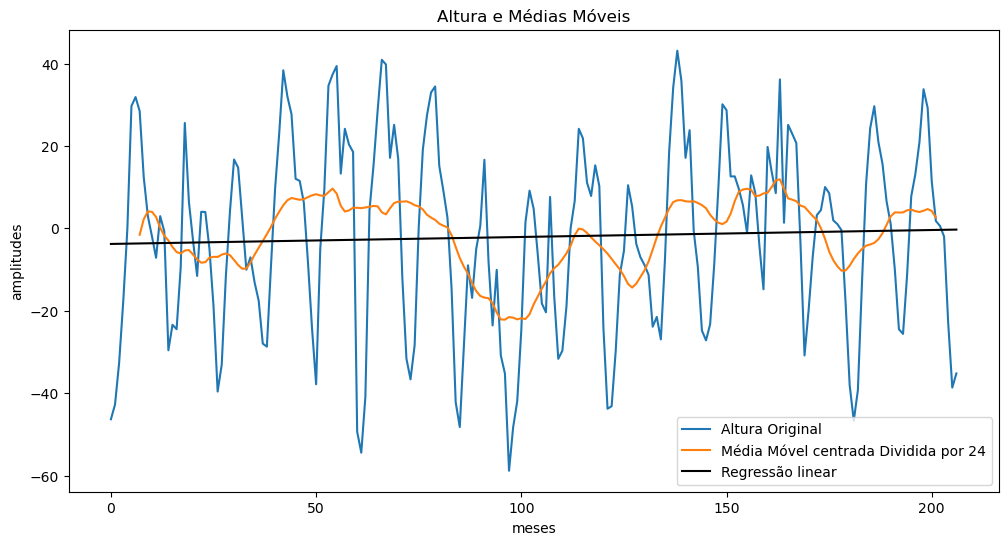

In [18]:
# Plotar as alturas originais
plt.figure(figsize =(12, 6))
plt.plot(df['alt_ref'], label='Altura Original')

# Plotar a média móvel de período 12
#plt.plot(data['Media_Movel_12'], label='Média Móvel de 12 Períodos')

# Plotar a média móvel centrada dividida por 24
#plt.plot(data['Media_Movel_2_Centrada'], label='Média Móvel 2 Centrada ')

plt.plot(df['Media_Movel_Centrada'], label= 'Média Móvel centrada Dividida por 24')
plt.plot(alt_est, 'k', label='Regressão linear')
# Adicionar rótulos e legendas
plt.xlabel('meses')
plt.ylabel('amplitudes')
plt.title('Altura e Médias Móveis')
plt.legend()

# Mostrar o gráfico
plt.show()

In [19]:
# Construindo a matriz A0 para regressão linear, para ver a tendencia da media movel 
A0_01 = np.column_stack([np.ones(len(df)), df['data_hora'].apply(lambda x: x.to_julian_date())])
#x0 = np.linalg.lstsq(A0, df['alt_zero'], rcond=None)[0]
x0_01 = np.linalg.lstsq(A0_01, df['Media_Movel_Centrada'], rcond=None)[0]
alt_est_01= A0.dot(x0_01) #tendencia estimada

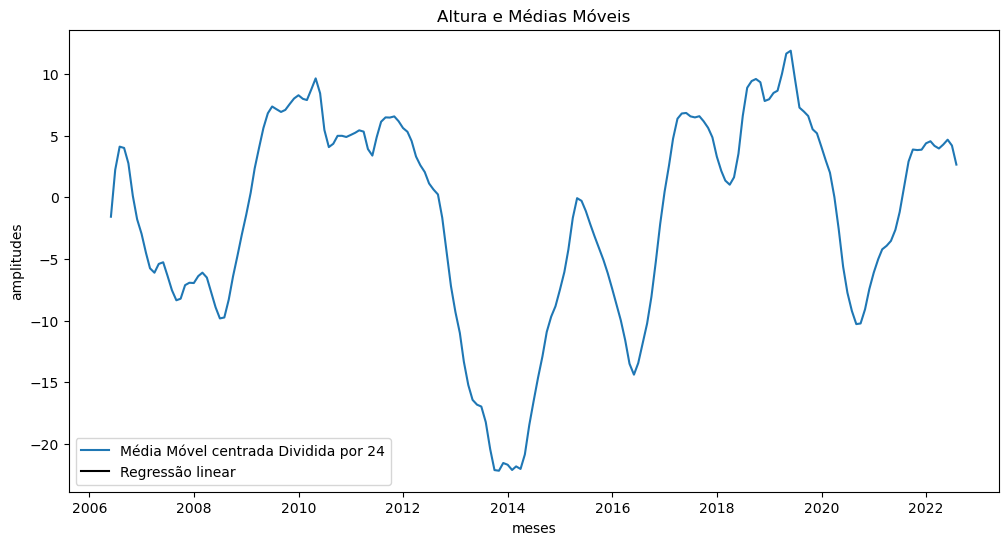

In [20]:
plt.figure(figsize =(12, 6))
plt.plot(df['data_hora'], df['Media_Movel_Centrada'], label= 'Média Móvel centrada Dividida por 24')
plt.plot(alt_est_01, 'k', label='Regressão linear')
# Adicionar rótulos e legendas
plt.xlabel('meses')
plt.ylabel('amplitudes')
plt.title('Altura e Médias Móveis')
plt.legend()

# Mostrar o gráfico
plt.show()

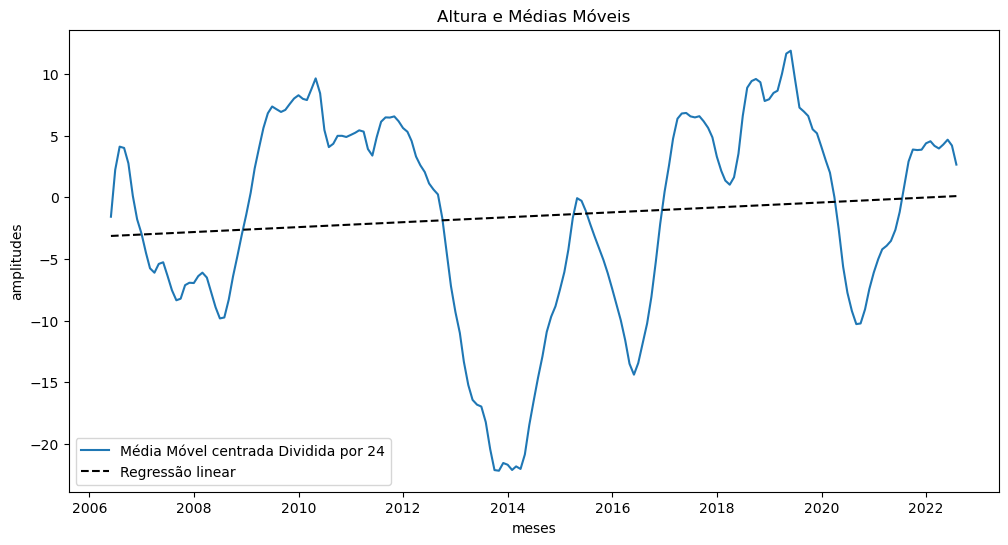

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Remover os valores NaN da média móvel centrada
df_cleaned = df.dropna(subset=['Media_Movel_Centrada'])

# Construindo a matriz A0 para regressão linear
A0_01 = np.column_stack([np.ones(len(df_cleaned)), df_cleaned['data_hora'].apply(lambda x: x.to_julian_date())])
# Calculando os coeficientes da regressão linear
x0_01 = np.linalg.lstsq(A0_01, df_cleaned['Media_Movel_Centrada'], rcond=None)[0]
# Calculando a tendência estimada
alt_est_01 = A0_01.dot(x0_01)


# Plotando os gráficos
plt.figure(figsize=(12, 6))

# Gráfico da Média Móvel centrada
plt.plot(df_cleaned['data_hora'], df_cleaned['Media_Movel_Centrada'], label='Média Móvel centrada Dividida por 24')
# Gráfico da tendência estimada
plt.plot(df_cleaned['data_hora'], alt_est_01, 'k--', label='Regressão linear')

# Adicionando rótulos e legendas
plt.xlabel('meses')
plt.ylabel('amplitudes')
plt.title('Altura e Médias Móveis')
plt.legend()

# Salvando o gráfico em um arquivo de imagem
plt.savefig('usando media movel.png')

# Mostrando o gráfico
plt.show()


In [22]:
import pandas as pd
from scipy.stats import linregress

# Convertendo a coluna de data_hora para o ano
df_cleaned.loc[:, 'ano'] = df_cleaned['data_hora'].dt.year

# Calculando a regressão linear
slope, intercept, r_value, p_value, std_err = linregress(df_cleaned['ano'], df_cleaned['Media_Movel_Centrada'])

# Tendência por ano (inclinação da reta)
tendencia_por_ano = slope

# Grau de incerteza
incerteza = std_err


print("Tendência por ano:", tendencia_por_ano)
print("Incerteza:", incerteza)


Tendência por ano: 0.19863783707953964
Incerteza: 0.1272293927085075


C:\Users\labdi\AppData\Local\Temp\ipykernel_22304\3075116897.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.loc[:, 'ano'] = df_cleaned['data_hora'].dt.year


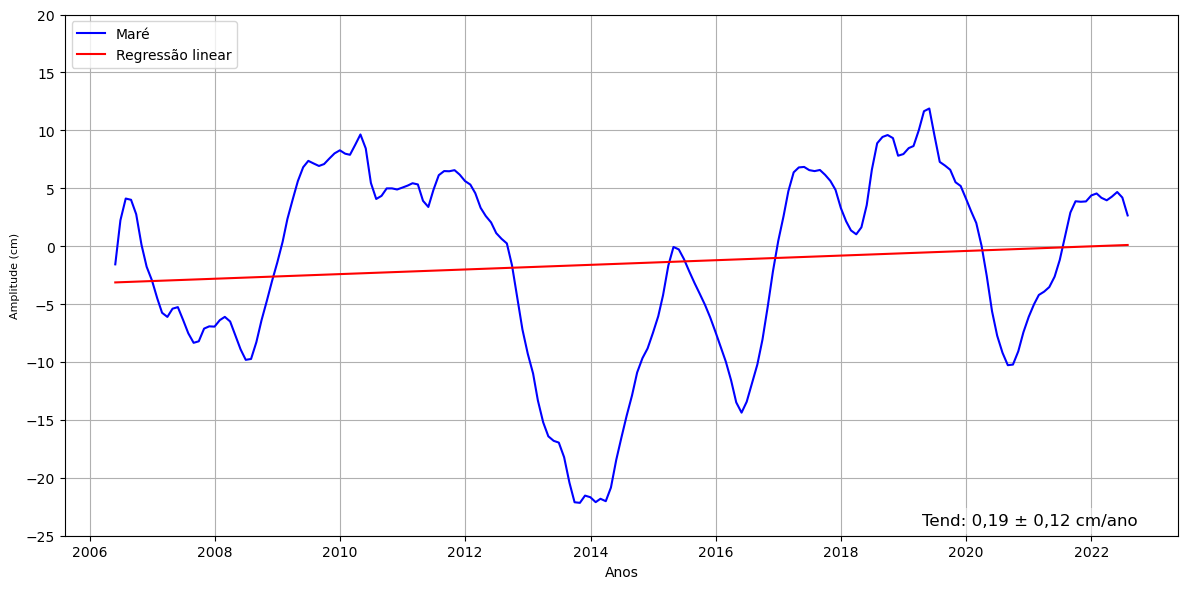

In [27]:
# Importe a biblioteca Matplotlib
import matplotlib.pyplot as plt

# Resolução desejada
dpi = 300
Trend = '0,19 ± 0,12'  # Defina o valor da tendência

# Plotagem do gráfico
plt.figure(figsize=(12, 6))
plt.plot(df_cleaned['data_hora'], df_cleaned['Media_Movel_Centrada'], 'b', label='Maré')
#plt.plot(df_mensal['data_hora'], df_mensal['nivel_do_mar_interp'], linestyle='--', color='b', label='Maré')  # Corrigido aqui
#plt.plot(df_mensal['data_hora'], tendencia, 'r', label='Regressão linear', 'lineWidth', 1.5)
plt.plot(df_cleaned['data_hora'], alt_est_01, 'r', label='Regressão linear', linewidth=1.5)


# Adicione o valor da tendência linear abaixo da legenda
plt.text(0.77, 0.02, f'Tend: {Trend} cm/ano', transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='w', edgecolor='none', alpha=0.5))

#plt.title('Nível médio anual mar em Santana', fontsize=12)
plt.legend(loc='upper left')
plt.xlabel('Anos')
plt.ylabel('Amplitude (cm)', fontsize=8)
plt.grid(True)
# Define os limites e os marcadores dos eixos y
plt.ylim(-25 , 20)
plt.yticks(range(-25, 21, 5))
# Define o formato do eixo x para mostrar anos e meses (AAAA, MM)
# Salvar a figura
plt.savefig('D:/graficos/Tendencia/nivel_medio_anual_Santana_sem_titulo.png', dpi=dpi)  # Salva a figura com a resolução especificada


plt.tight_layout()
plt.show()

In [26]:
media = np.mean(df_cleaned['Media_Movel_Centrada'])
print('media:', media)
desvio = np.std(df_cleaned['Media_Movel_Centrada'])
print('desvio:', desvio)
mediana = np.median(df_cleaned['Media_Movel_Centrada'])
print('mediana:', mediana)
variance = np.var(df_cleaned['Media_Movel_Centrada'])
print('variance:', variance)

media: -1.5145386841162538
desvio: 8.371427121130406
mediana: 0.45368658260797545
variance: 70.08079204439771


In [27]:
tendencia = 0.34
erro_padrao = 0.32
z = 1.96  # valor crítico para um coeficiente de confiança de 95%

intervalo_superior = tendencia + (erro_padrao * z)
intervalo_inferior = tendencia - (erro_padrao * z)

print("Intervalo de Confiança de 95% para a Tendência:")
print("Superior:", intervalo_superior)
print("Inferior:", intervalo_inferior)


Intervalo de Confiança de 95% para a Tendência:
Superior: 0.9672000000000001
Inferior: -0.28719999999999996


D:\teste2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


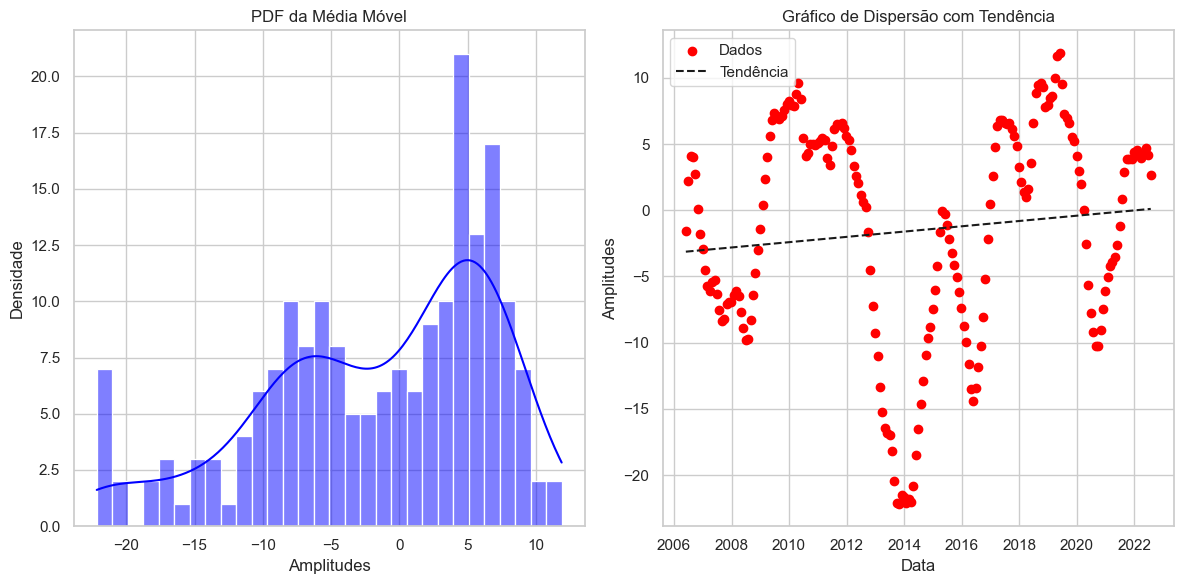

In [48]:
import seaborn as sns

# Definindo o estilo do seaborn
sns.set(style="whitegrid")

# Criando uma figura com subplots
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # Gráfico de PDF
plt.subplot(1, 2, 2)  # Gráfico de dispersão com tendência

# Gráfico de PDF
plt.subplot(1, 2, 1)
sns.histplot(df_cleaned['Media_Movel_Centrada'], kde=True, color='blue', bins=30)
plt.xlabel('Amplitudes')
plt.ylabel('Densidade')
plt.title('PDF da Média Móvel')

# Gráfico de dispersão com tendência
plt.subplot(1, 2, 2)
plt.scatter(df_cleaned['data_hora'], df_cleaned['Media_Movel_Centrada'], label='Dados', color='red')
plt.plot(df_cleaned['data_hora'], alt_est_01, 'k--', label='Tendência')
plt.xlabel('Data')
plt.ylabel('Amplitudes')
plt.title('Gráfico de Dispersão com Tendência')
plt.legend()

# Ajustando o layout para evitar sobreposição
plt.tight_layout()

# Mostrando os gráficos
plt.show()


In [57]:
print(slope)

0.0005471882431542852


In [63]:
end = len(alt_est_01) - 1
taxa = (alt_est_01[end] - alt_est_01[0]) /len(A0_01)



In [64]:
taxa

0.01656998244013313

In [65]:
# Calculando os resíduos da regressão
residuos = df_cleaned['Media_Movel_Centrada'] - alt_est_01

# Graus de liberdade
n = len(df_cleaned)  # número de observações
p = A0_01.shape[1]   # número de parâmetros (incluindo o intercepto)

# Calculando o erro padrão da regressão
erro_padrao_regressao = np.sqrt(np.sum(residuos**2) / (n - p))

# Agora você pode usar o erro padrão da regressão para calcular a incerteza
incerteza = 1.96 * erro_padrao_regressao  # 1.96 é o valor crítico para um intervalo de confiança de 95%

print("Incerteza estimada:", incerteza)


Incerteza estimada: 16.38903817761394
